# PROJECT DESCRIPTION

he table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

IMPORTING REQUIRED LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

IMPORTING DATASET

In [7]:
df=pd.read_csv("Avacado_Case_Study.csv")

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [9]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are many dummy rows that needs to be removed before proceeding

In [10]:
df.dropna()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


Now the dataset contains 14 columns including the target column AveragePrice

In [11]:
#checking data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


# As we have to predict the Average price we can drop the unanamed, type year region and date columns

In [14]:
df.drop(['Date','type','year','region'], axis='columns', inplace=True)

In [15]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [16]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [17]:
df.drop("Unnamed: 0",axis="columns",inplace=True)

In [18]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


In [19]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.dropna()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


In [21]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_new=df.dropna()

In [23]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00


The dataset now consists of 9 columns including the target column "Average Price"

In [26]:
#checking data info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
dtypes: float64(9)
memory usage: 118.5 KB


In [27]:
#checking null values
df_new.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
dtype: int64

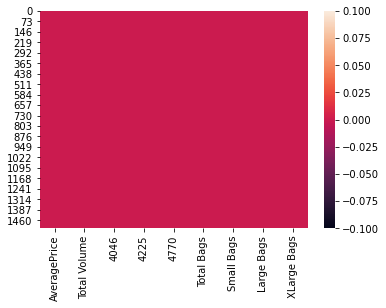

In [28]:
#Checking null values using heatmap
sns.heatmap(df_new.isnull())

SO the dataset doesn't contain any null values.

# DATA VISUALIZATION USING GRAPH PLOTS

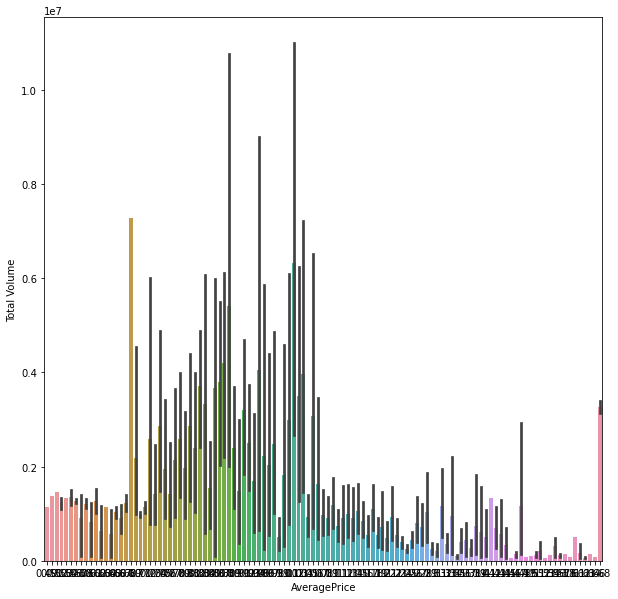

In [29]:
#Average_Price v/s Total Volume
plt.figure(figsize=(10,10))
sns.barplot(x='AveragePrice',y="Total Volume",data=df_new)

There is mostly increasind trend

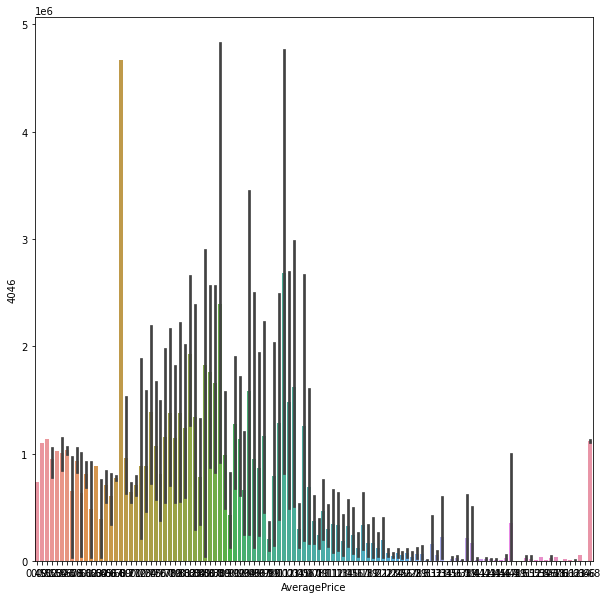

In [30]:
#Average_Price v/s type 4046
plt.figure(figsize=(10,10))
sns.barplot(x='AveragePrice',y="4046",data=df_new)

There is first dcreasing then increasing and again decreasing trend

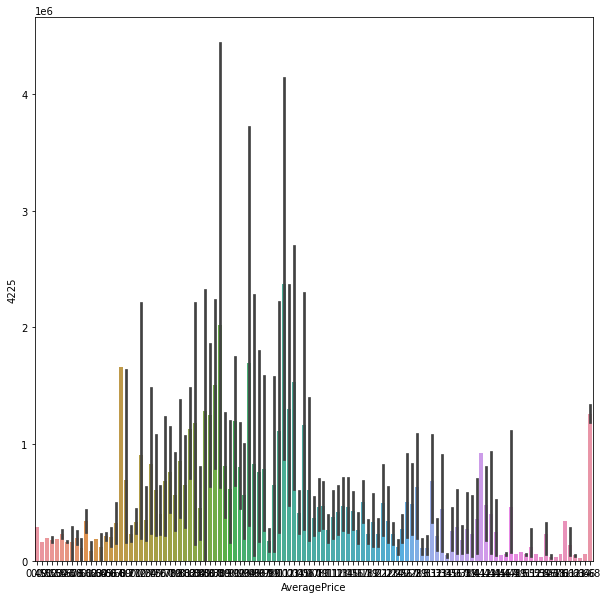

In [31]:
#Average_Price v/s type 4225
plt.figure(figsize=(10,10))
sns.barplot(x='AveragePrice',y="4225",data=df_new)

There is mostly increasing and then decreasing trend

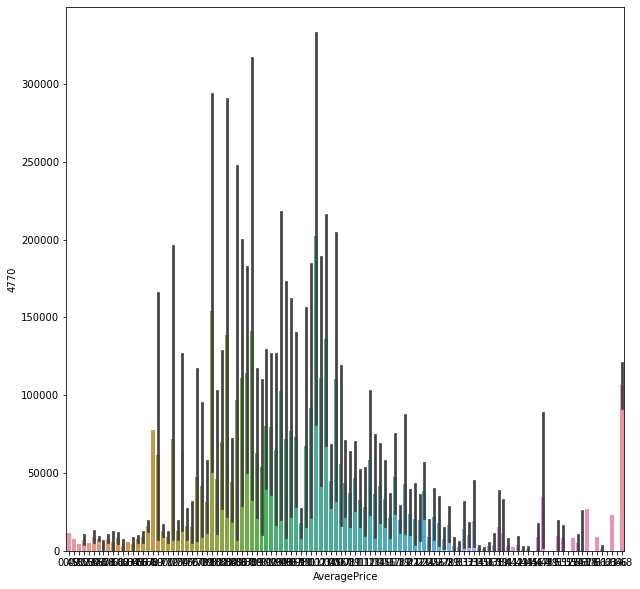

In [32]:
#Average_Price v/s type 4770
plt.figure(figsize=(10,10))
sns.barplot(x='AveragePrice',y="4770",data=df_new)

There is mostly increasing and then decreasing trend

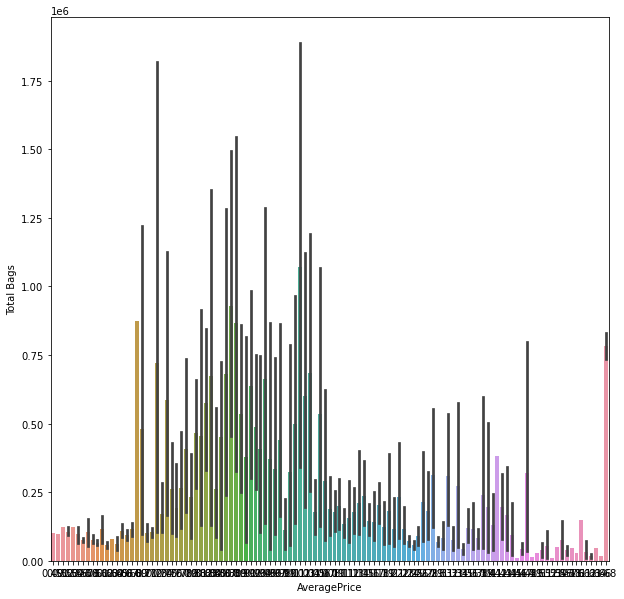

In [33]:
#Average_Price v/s TotalBags
plt.figure(figsize=(10,10))
sns.barplot(x='AveragePrice',y="Total Bags",data=df_new)

# As we can see that Total Bags is sum of Small Bags,Large Bags and X large Bags....so we can drop Small Bags,Large Bags and X large columns

In [34]:
df_new.drop(['Small Bags','Large Bags','XLarge Bags'], axis='columns', inplace=True)

In [35]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87
1,1.35,54876.98,674.28,44638.81,58.33,9505.56
2,0.93,118220.22,794.70,109149.67,130.50,8145.35
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16
4,1.28,51039.60,941.48,43838.39,75.78,6183.95
...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73


# CHECKING COLLINEARITY

In [37]:
corr_mat=df_new.corr() #multivariate analysis
corr_mat

,AveragePrice,Total Volume,4046,4225,4770,Total Bags
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000


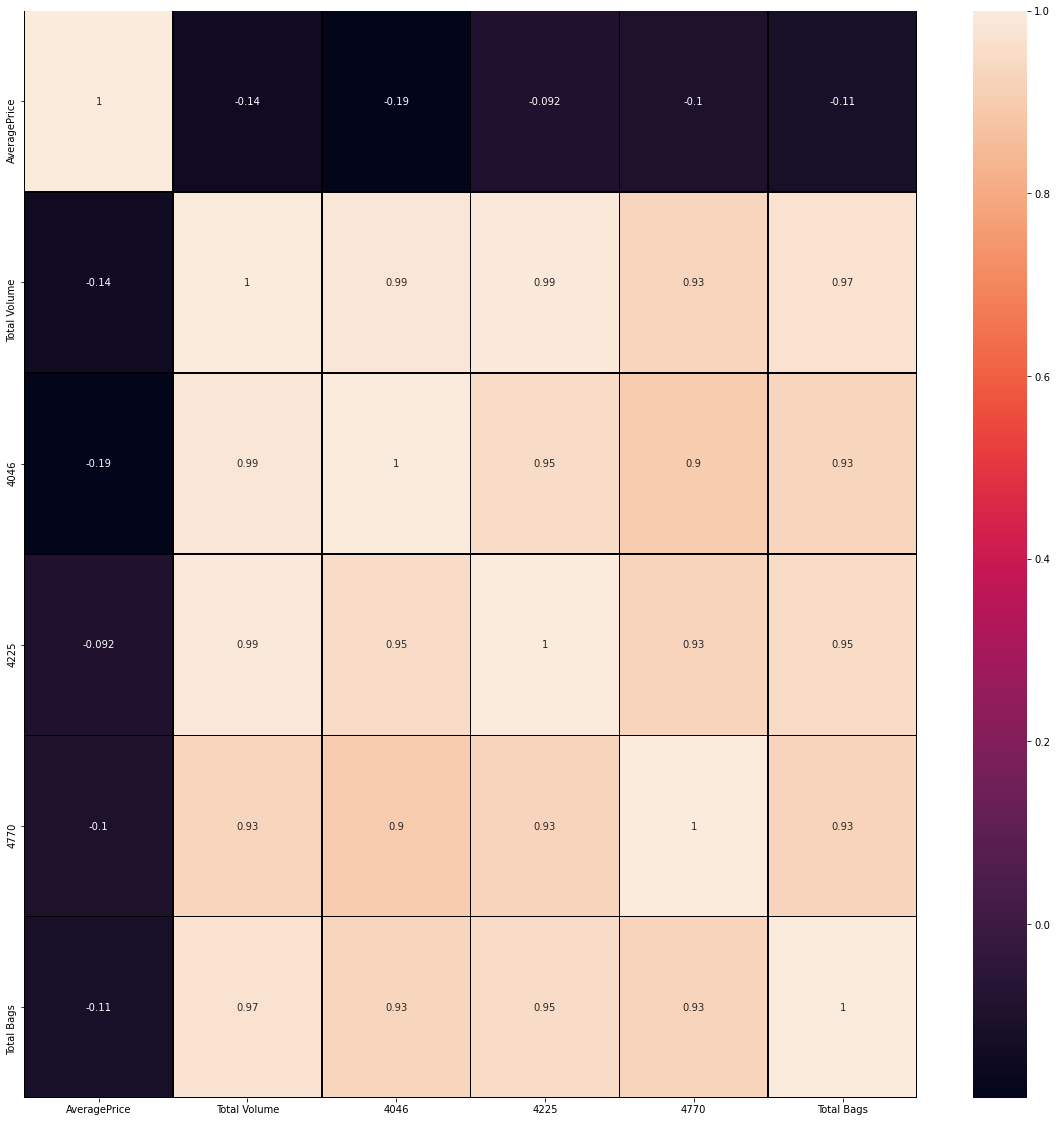

In [38]:
#checking correlation using heatmap
plt.figure(figsize=[20,20])
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,linecolor="black")

In [40]:
#statistical summary
df_new.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06


The data contains some skewness

# Trying to find the distribution

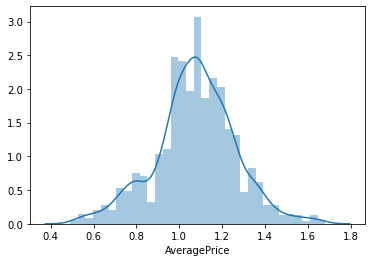

In [41]:
sns.distplot(df_new['AveragePrice'])

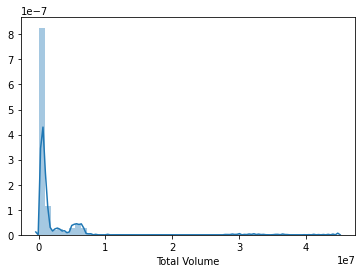

In [42]:
sns.distplot(df_new['Total Volume'])

Highly skewed data

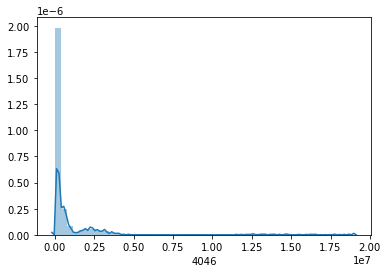

In [43]:
sns.distplot(df_new['4046'])

Highly skewed data

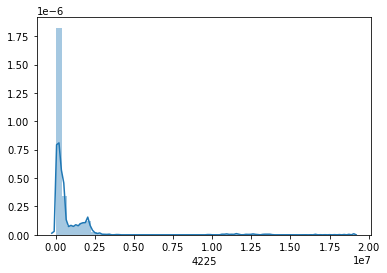

In [44]:
sns.distplot(df_new['4225'])

Highly skewed data

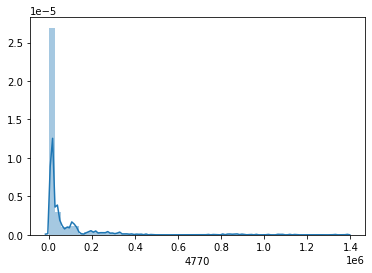

In [45]:
sns.distplot(df_new['4770'])

Highly skewed data

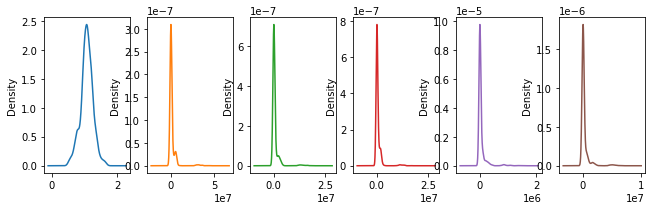

In [47]:
#multivariate analysis
df_new.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,figsize=(20,20))
plt.show()

# CHECKING OUTLIERS

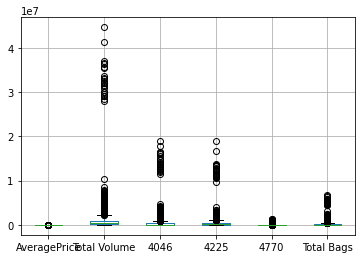

In [48]:
df_new.boxplot()

In [49]:
z=np.abs(zscore(df_new))
z.shape

(1517, 6)

In [50]:
threshold=3
print(np.where(z>3))

(array([ 412,  760, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183,
       1183, 1184, 1184, 1184, 1184, 1184, 1185, 1185, 1185, 1185, 1185,
       1186, 1186, 1186, 1186, 1186, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189, 1190, 1190,
       1190, 1190, 1190, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1193, 1193, 1193, 1193, 1193, 1194, 1194, 1194, 1194,
       1194, 1195, 1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198, 1198, 1199,
       1199, 1199, 1199, 1199, 1200, 1200, 1200, 1200, 1200, 1201, 1201,
       1201, 1201, 1201, 1202, 1202, 1202, 1202, 1202, 1203, 1203, 1203,
       1203, 1203, 1204, 1204, 1204, 1204, 1204, 1205, 1205, 1205, 1205,
       1205, 1206, 1206, 1206, 1206, 1206, 1411, 1457, 1458, 1496],
      dtype=int64), array([4, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5,
       1, 2, 3, 4, 5, 1, 2, 3, 4, 5

In [53]:
df_new1=df_new[(z<3).all(axis=1)]
print(df_new.shape)
print(df_new1.shape)

(1517, 6)
(1486, 6)


In [54]:
loss_percentage=(1517-1486)/1517*100
print(loss_percentage)

2.0435069215557022


We can consider the new dataset as there is no huge loss of data

# SPLITTING THE DATASET

In [55]:
x=df_new1.drop('AveragePrice',axis=1)
y=df_new1['AveragePrice']

In [56]:
#checking skewness....no problem if we do it after splitting because correcting skewness won't delete any rows
x.skew()

Total Volume    2.281956
4046            2.653101
4225            2.041615
4770            3.078420
Total Bags      3.283816
dtype: float64

It is highly skewed dataset

# REMOVING SKEWNESS

In [57]:
from sklearn.preprocessing import power_transform

In [58]:
df_new2=power_transform(x)
df_new2=pd.DataFrame(df_new2,columns=x.columns)

In [60]:
df_new2.skew()

Total Volume    0.062366
4046           -0.030084
4225            0.000549
4770           -0.054890
Total Bags      0.006639
dtype: float64

The skewness is now within the acceptable range

In [61]:
x=df_new2#saving the data in new variable

In [62]:
x

,Total Volume,4046,4225,4770,Total Bags
0,-1.577056,-1.732207,-0.547769,-1.658425,-2.010807
1,-1.744182,-1.882713,-0.671221,-1.605509,-1.915185
2,-0.969146,-1.825662,-0.116208,-1.372075,-2.081999
3,-1.364099,-1.700995,-0.374573,-1.543901,-2.459006
4,-1.822584,-1.766250,-0.682461,-1.531585,-2.388296
...,...,...,...,...,...
1481,-0.532882,-0.135443,-0.526342,0.461320,-0.178246
1482,-0.593066,-0.260389,-0.574155,0.508222,-0.125562
1483,-0.592197,-0.230698,-0.565837,0.440172,-0.137242
1484,-0.540788,-0.162606,-0.557670,0.460372,-0.117345


# MODEL TRAINING

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Finding Best Random State 

In [64]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predlr=LR.predict(x_test)
    RMS=r2_score(y_test,predlr)
    if RMS>maxAccu:
        maxAccu=RMS
        maxRS=i
print("Best R2 Score is: ",maxAccu,"on Random_state: ",maxRS)

Best R2 Score is:  0.4422599948249115 on Random_state:  384


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=384)

In [66]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print("r2 score: ",r2_score(y_test,pred))
    print("Error:")
    print("Mean_Absolute_Error: ",mean_absolute_error(y_test,pred))
    print("Mean_Squared_Error: ",mean_squared_error(y_test,pred))
    print("Root_Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,pred)))

In [67]:
eval(LinearRegression())

r2 score:  0.4422599948249115
Error:
Mean_Absolute_Error:  0.11720422860621252
Mean_Squared_Error:  0.02195205285043133
Root_Mean_Squared_Error:  0.14816225177295103


In [68]:
eval(DecisionTreeRegressor())

r2 score:  0.6196668796322243
Error:
Mean_Absolute_Error:  0.08511210762331839
Mean_Squared_Error:  0.0149695067264574
Root_Mean_Squared_Error:  0.12234993553924498


In [69]:
eval(RandomForestRegressor())

r2 score:  0.7843577511169195
Error:
Mean_Absolute_Error:  0.06645224215246637
Mean_Squared_Error:  0.008487449349775786
Root_Mean_Squared_Error:  0.09212735397142255


In [70]:
eval(SVR())

r2 score:  0.6957346184903771
Error:
Mean_Absolute_Error:  0.08323249739951465
Mean_Squared_Error:  0.011975561504430923
Root_Mean_Squared_Error:  0.10943290869035202


# Cross Validation

In [71]:
scr=cross_val_score(LinearRegression(),x,y,cv=5)
print("scr for LR",scr.mean())

scr for LR 0.14826377363967813


In [72]:
scr=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print("scr for DTR",scr.mean())

scr for DTR -0.4019564770568559


In [73]:
scr=cross_val_score(RandomForestRegressor(),x,y,cv=5)
print("scr for RFR",scr.mean())

scr for RFR 0.12666406986038053


In [74]:
scr=cross_val_score(SVR(),x,y,cv=5)
print("scr for SVM",scr.mean())

scr for SVM -0.0651271337383568


In [75]:
#calculating differencec between accuracy score and cv score
LR1=(.4422-.1482)*100
DTR1=(.6196+.4019)*100
RFR1=(.7843-.1266)*100
SVR1=(.6957+.0651)*100

In [76]:
LR1

29.4

In [77]:
DTR1

102.15

In [78]:
RFR1

65.77

In [79]:
SVR1

76.08

From the above it is confirmed that Linear Regression is the best model

# HYPERPARAMETER TUNING

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [88]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [89]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

-0.005032215869970491

In [90]:
cv_score=cross_val_score(ls,x,y,cv=5)

In [91]:
cv_score.mean()

-0.05352456966213119

In [93]:
import joblib
joblib.dump(Lasso(),"Avacado_Case_Study_Final_Result.pkl")

['Avacado_Case_Study_Final_Result.pkl']